# Исследование стартапов

## Введение

- Автор: Тюлюпов Глеб
- Дата: 25.04.2025

### Цели и задачи проекта

**Цель:** Проведение исследовательского анализа набора датасетов, содержащих информацию о покупке стартапов, подготовка ответетов на вопросы заказчика, как о предобработке, так и о значении данных для бизнеса.   

**Задачи:**
1. Знакомство с данными: загрузка и первичная предобработка, в том числе:
     - вывод общей информации, исправление названия столбцов.
     - смена типов и анализ пропусков.
2. Предобработка данных, предварительное исследование, в том числе:
     - оценка раундов финансирования по годам;
     - поиск зависимости ли полноты сведений о сотрудниках от размера компаний;
     - оценка возможности объединения данных;
     - предобработка датасета company_and_rounds.csv.
3. Исследовательский анализ объединённых таблиц, в том числе:
    - объединение данных и выявление компаний, которые меняли или готовы менять владельцев;
    - анализ выбросов размера средств, который предоставлялся компаниям;
    - исследование компаний, которые были проданы за ноль или за один доллар;
    - выявление категорий стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен;
    - анализ типичного количества раундов для каждого возможного статуса стартапа.
    
4. Формулирование выводов и рекомендаций по проведённому анализу.

### Содержимое проекта

 Проект включает в себя следующие основные этапы:
   1. Знакомство с данными: загрузка и первичная предобработка.
   2. Предобработка данных, предварительное исследование.
   3. Исследовательский анализ объединённых таблиц.
   4. Итоговый вывод и рекомендации.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка


### 1.1. Вывод общей информации, исправление названия столбцов


Начнём с загрузки необходимых библиотек. Будем использовать `pandas` и библиотеки визуализации данных `matplotlib` и `seaborn`.

In [1]:
# Импортируем библиотеку pandas
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

Далее выгрузим датасеты с данными, в том числе датасеты: 
 - company_and_rounds.csv;
 - acquisition.csv;
 - people.csv;
 - education.csv;
 - degrees.csv.
 
Данные датасетов сохраним в  переменных:
 - comp_df;
 - acq_df;
 - people_df;
 - education_df;
 - degrees_df.

In [2]:
# Задаём константу
PATH = "https://code.s3.yandex.net/datasets/"

# Выгружаем данные датасетов в переменные

comp_df=pd.read_csv(PATH +'company_and_rounds.csv')
acq_df=pd.read_csv(PATH +'acquisition.csv')
people_df=pd.read_csv(PATH + 'people.csv')
education_df=pd.read_csv(PATH + 'education.csv')
degrees_df=pd.read_csv(PATH + 'degrees.csv')

Далее познакомимся с данными и изучим общую информацию о них. Для этого выгрузим первые двадцать строк датасета `company_and_rounds.csv` методом `head()`. Также изучим общую информацию о датафрейме с помощью метода `info()`.

In [3]:
#Выведем первые двадцать строк датасета company_and_rounds
comp_df.head(20)

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaN,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaN,NaN,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Далее выведем общую информацию о датасете с помощью метода `info()`.

In [4]:
# Выведем информацию о датафрейме comp_df с помощью метода info()
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Дополнительно выведем первые пять строк для столбцов funding rounds,funding total, не отобразившихся в прошлой выгрузке.

In [5]:
#Выведем первые двадцать строк funding  rounds и funding  total
comp_df[['funding  rounds','funding  total']].head(20)

,funding rounds,funding total
0,3.0,39750000.0
1,3.0,39750000.0
2,3.0,39750000.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


Датасет `company_and_rounds.csv` содержит 22 столбца и 217 774 строк, в которых представлена информация о компаниях и раундах финансирования.

После первичного анализа данных можно сделать следующие выводы:

 - Два столбца имеют аналогичные названия, отличающиеся только разрядностью -  `company  ID` и `company  id`, что может быть связано с тем, что столбец `company  ID` относится к общей информации о компании, в то время как `company  id` относится к информации о раундах финансирования. Изменим название столбца `company  id` на `company  id_fund`. 

 - Названия столбцов необходимо привести к формату `snake_case`, в том числе заменить пробелы между словами на символ `_`, а также понизив разрядность в названии столбца `company  ID`.

 - Cтолбцы `name`, `category`,  `code`, `status`, `domain`, `network username`, `country code`, `funding round type` содержат текстовую информацию, в связи с чем текущий для них формат `object` является оптимальным.
 
 - Для столбцов `founded  at`, `closed  at`, `funded  at` оптимальным вариантом будет привести данные к формату `datetime64`.
 
 - Столбцы  `company  ID`, `investment  rounds`, `funding  rounds`, `funding  total`, `milestones`, `funding  round  id,` `funding  round  id`, `company  id`,  `raised  amount`, `pre  money  valuation`, `participants` содержат данные в формате `float64`. Для данных столбцов оптиальным вариантом будет привести данные к формату `integer`. Однако данные столбцы содержат пропуски, которые необходимо предварительно обработать.
 
 - Столбцы `is  first  round`, `is  last  round` содержат информацию в формате `float64`, однако оптимальным вариантом будет привести их к формату `bool`.

Переименуем столбец `company  id`.

In [6]:
#Переименуем столбец company  id
comp_df.rename(columns={'company  id':'company  id_fund'}, inplace=True)

Приведём названия столбцов к формату `snake_case`

In [7]:
# Приведём названия столбцов к нижнему регистру
comp_df.columns=comp_df.columns.str.lower()
#Удалим лишние пробелы
comp_df.columns=comp_df.columns.str.replace('  ', ' ')
#Заменим пробелы в названиях на '_'
comp_df.columns=comp_df.columns.str.replace(' ', '_')

Выведем результат выполненных преобразований.

In [8]:
#Выведем скорректированные названия столбцов
comp_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_fund', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

  Как видно из выгрузки все столбцы датасета содержат пропуски. При этом столбцы `company  ID`, `name, status`, `investment  rounds`, `funding  rounds`, `funding  total`,  `milestones` содержат одинаковое количество пропусков - по 302. Также совпадает количество пропусков для столбцов `funding  round  id`, `company  id`, `funding  round  type`, `raised  amount`, `pre  money  valuation`, `participants`,  `is  first  round`, `is  last  round` - 164 846. 
  
  Подробнее пропуски данного датасета будут изучены в разделе 2.4.

Далее аналогичным образом рассмотрим датасет `acquisition.csv`.

In [9]:
#Выведем первые двадцать строк датасета acquisition
acq_df.head(20)

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
5,11,227,228,NaN,7140000,2003-08-05
6,12,5,230,cash,0,2007-07-01
7,14,318,314,cash,0,2006-10-01
8,15,20,333,stock,1500000000,2002-07-08
9,16,342,341,cash,350000000,2007-08-01


In [10]:
# Выведем информацию о датафрейме acq_df с помощью метода info()
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет `acquisition.csv` содержит 6 столбцов и 9 407 строк, в которых представлена информация о покупках одними компаниями других компаний.

После первичного анализа данных можно сделать следующие выводы:

 - Названия столбцов уже приведены к оптимальному формату.

 - Cтолбцы `id`, `acquiring_company_id`,  `acquired_company_id`, `price_amount` содержат информацию в формате `integer`. Для данных столбцов можно оптимизировать разрядность с помощью метода `to_numeric`.
 
 - Столбцы `term_code` и `acquired_at` содержат данные в формате `object`. Столбец `term_code` содержит текстовую информацию, однаков предварительно изучив уникальные значения по столбцу, можно привести его к формату `category`. Данные для столбца `acquired_at` можно привести к формату `datetime64`. 
 
 - Для столбцов `founded  at`, `closed  at`, `funded  at` оптимальным вариантом будет привести данные к формату `datetime64`.

Далее изучим датасет `people.csv`. Выведем первые 20 строк датасета. 

In [11]:
# Выведем первые двадцать строк датасета people
people_df.head(20)

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN
6,100006,Courtney,Homer,81558.0,jobsbostontech
7,100009,Eddy,Badrina,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette
9,100011,Jeff,Grell,NaN,NaN


In [12]:
# Выведем информацию о датафрейме people_df с помощью метода info()
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет `people.csv` содержит 5 столбцов и 226 709 строк, в которых представлена информация о информация о сотрудниках.

После первичного анализа данных можно сделать следующие выводы:

 - Названия столбцов уже приведены к оптимальному формату.
 
 - Данные в столбце `id` содержатся в формате `integer`, что для данного столбца является оптимальным вариантом, однако можно привести данные к оптимальной разрядности с помощью метода `to_numeric`.
 
 - Информация в столбце `company_id` содердится в формате `float`. Для данного столбца оптимальным вариантом будет привести данные к формату `integer` с оптимальной разрядностью  с помощью метода `to_numeric`. Однако, поскольку в столбце содержатся пропуски, возникает необходимость и предварительной обработки.
 
 - Столбцы `first_name`, `last_name` и `network_username` содержат текстовую информацию, в сязи с чем формат `object` является для них оптимальным.

Далее рассмотрим датасет `education.csv`, содержащий информацию об образовании сотрудников.

In [13]:
# Выведем первые двадцать строк датасета education
education_df.head(20)

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN
5,6,1017,Northeastern University,1988-01-01
6,7,6176,Rochester Institute of Technology,2002-01-01
7,8,5412,University of Cambridge,2002-01-01
8,9,1243,University of Oregon,1997-01-01
9,10,6265,University of Pennsylvania,1989-01-01


In [14]:
# Выведем информацию о датафрейме education_df с помощью метода info()
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет `education.csv` содержит 4 столбца и 109 610 строк, в которых представлена информация о информация о образовании сотрудников.

После первичного анализа данных можно сделать следующие выводы:

 - Названия столбцов уже приведены к оптимальному формату.
 
 - Данные в столбцах `id` и `person_id` содержатся в формате `integer`, что является оптимальным вариантом, однако можно привести данные к оптимальной разрядности с помощью метода `to_numeric`.

 - Столбцы `instituition` и `graduated_at` содержат информацию в формате `object`. Для столбца `instituition` данный формат является оптимальным, однако для столбца `graduated_at` данные лучше привести к формату `datetime`.

В заключении рассмотрим информацию о датасете `degrees.csv`, содержащем информацию о типе образования сотрудников.

In [15]:
#Выведем первые двадцать строк датасета degrees
degrees_df.head(20)

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
5,6,p:1017,BS,Computer Science
6,7,p:6176,BS,Computer Science
7,8,p:5412,MS,Politics
8,9,p:1243,BA,International Business & Marketing
9,10,p:6265,BS,Economics


In [16]:
# Выведем информацию о датафрейме degrees_df с помощью метода info()
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет `degrees.csv` содержит 4 столбца и 109 610 строк.

После первичного анализа данных можно сделать следующие выводы:

 - Названия столбцов уже приведены к оптимальному формату.
 
 - Данные в столбце `id` содержатся в формате `integer`, что является оптимальным вариантом, однако можно привести данные к оптимальной разрядности с помощью метода `to_numeric`.
 
 - Информация в столбце `object_id` содержится в формате `object`. Для данного столбца можно скорректировать формат на `integer`, предварительно изучив все ли значения в столбце начинаются с приставки `p:`.

 - Столбцы `degree_type` и `subject` содержат информацию в формате `object`. Для столбца `subject` данный формат является оптимальным, однако для столбца `graduated_at` данные лучше привести к формату `category`, предварительно изучив уникальные значения в столбце.

Первичное знакомство показывает, что для датасетов `acquisition.csv`, `people.csv`, `education.csv` и `degrees.csv`названия столбцов уже приведены к оптимальному формату и соответствуют описанию. Для датасета `company_and_rounds.csv` столбец `company id` был переименован на `company_id_fund`, названия всех остальных столбцов были приведены к формату `snake_case`.


В большинстве случаев используются верные типы данных, однако для части числовых данных можно оптимизировать разрядность, а также заменить в некоторых столбцах формат с `float` на `integer`, с `object` на `category`.
Для столбцов `founded_at`, `closed_at`, `funded_at` датасета `company_and_rounds.csv`  оптимальным вариантом будет привести данные к формату `datetime64`. Тоже самое можно проделать для столбца `acquired_at` датафрейма `acquisition.csv`, `graduated_at` датафрейма `education.csv`.

### 1.2. Смена типов и анализ пропусков

Обработаем типы данных в столбцах, которые хранят значения даты и времени, то есть приведём их к формату `datetime64[ns]`. Для начала обработаем нужные столбцы в датафрейме `company_and_rounds.csv`.

In [17]:
# Приведём данные к формату datetime64[ns]
comp_df['founded_at'] = pd.to_datetime(comp_df['founded_at'], format='%Y-%m-%d')
comp_df['closed_at'] = pd.to_datetime(comp_df['closed_at'], format='%Y-%m-%d')
comp_df['funded_at'] = pd.to_datetime(comp_df['funded_at'], format='%Y-%m-%d')

Выведем информацию о датасете с учётом изменений.

In [18]:
# Выведем информацию о датасете comp_df
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

Аналогичным образом изменим формат данных для столбцов `acquired_at` датафрейма `acquisition.csv` и  `graduated_at` датафрейма `education.csv`.

In [19]:
# Приведём данные к формату datetime64[ns]
acq_df['acquired_at'] = pd.to_datetime(acq_df['acquired_at'], format='%Y-%m-%d')
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], format='%Y-%m-%d')

Выведем информацию о датасетах с учётом изменений.

In [20]:
# Выведем информацию о датасете acq_df
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [21]:
# Выведем информацию о датасете education_df
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


Далее проведём анализ пропусков в датасетах.

Рассмотрим количество и долю пропусков в столбцах датафрейма `comp_df`.

In [22]:
# Выведем количество пропусков каждом столбце датафрейма comp_df
print('Количество пропусков каждом столбце датафрейма comp_df')
print(comp_df.isna().sum())
# Подсчитываем долю строк с пропусками в датафрейме comp_df
print('Доля пропусков каждом столбце датафрейма comp_df')
print(comp_df.isna().mean()*100)

Количество пропусков каждом столбце датафрейма comp_df
company_id                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_fund        164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64
Доля пропусков каждом столбце датафрейма comp_df
company_id              0.138676
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32

Как видно из выгрузки все столбцы датасета содержат пропуски. При этом столбцы `company_id`, `name`, `status`, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones` содержат одинаковое количество пропусков - по 302. Также совпадает количество пропусков для столбцов `funding`  `round_id`, `company_id_fund`, `funding_round_type`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round`, `is_last_round` - 164 846.

Подробнее пропуски данного датасета будут изучены в разделе 2.4.

Рассмотрим количество и долю пропусков в столбцах датасета `acquisition.csv`.

In [23]:
# Выведем количество пропусков каждом столбце датафрейма comp_df
print('Количество пропусков каждом столбце датафрейма acq_df')
print(acq_df.isna().sum())
# Подсчитываем долю строк с пропусками в датафрейме comp_df
print('Доля пропусков каждом столбце датафрейма comp_df')
print(acq_df.isna().mean()*100)

Количество пропусков каждом столбце датафрейма acq_df
id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64
Доля пропусков каждом столбце датафрейма comp_df
id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64


Пропуски содержатся в столбцах `term_code` и `acquired_at` содержащие информацию о вариантах расчёта и дате сделки соответственно. Процент пропусков в столбце `term_code` превышает 80%. Пропуски в данном столбце могут быть связаны с невозможностью определить тип расчёта или отсутствием соответствующей информации, например, в зависимости от даты сделки (столбец `acquired_at`).

Процент пропусков в столбце `acquired_at` составляет 0,3%. Данные пропуски с высокой вероятностью связаны с отсутствием соответствующий информации  о дате сделки.

Рассмотрим количество и долю пропусков в столбцах датасета `people.csv`.

In [24]:
# Выведем количество пропусков каждом столбце датафрейма comp_df
print('Количество пропусков каждом столбце датафрейма people_df')
print(people_df.isna().sum())
# Подсчитываем долю строк с пропусками в датафрейме people_df
print('Доля пропусков каждом столбце датафрейма people_df')
print(people_df.isna().mean()*100)

Количество пропусков каждом столбце датафрейма people_df
id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64
Доля пропусков каждом столбце датафрейма people_df
id                   0.000000
first_name           0.002205
last_name            0.000441
company_id          84.731528
network_username    82.855996
dtype: float64


Во всех столбцах кроме `id` содержатся пропуски. Больше всего пропусков содержится в столбце `company_id` - 84,7%, что может быть связано с отсутствием соответствующей  информации о компании сотрудников. Также значительная доля пропусков содержится в столбце `network_username` - 82,9%, что может быть связано с отсутствием ника в социальных сетях.

Рассмотрим количество и долю пропусков в столбцах датасета education.csv.

In [25]:
# Выведем количество пропусков каждом столбце датафрейма education_df
print('Количество пропусков каждом столбце датафрейма education_df')
print(education_df.isna().sum())
# Подсчитываем долю строк с пропусками в датафрейме education_df
print('Доля пропусков каждом столбце датафрейма education_df')
print(education_df.isna().mean()*100)

Количество пропусков каждом столбце датафрейма education_df
id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64
Доля пропусков каждом столбце датафрейма education_df
id               0.000000
person_id        0.000000
instituition     0.050178
graduated_at    47.035854
dtype: float64


Пропуски содержатся в столбцах `instituition` и `graduated_at`. Наличие пропусков может объясняться отсутствием соответствующей информации или самого образования у сотрудников.

В заключение рассмотрим количество и долю пропусков в столбцах датасета `degrees.csv`.

In [26]:
# Выведем количество пропусков каждом столбце датафрейма degrees_df
print('Количество пропусков каждом столбце датафрейма degrees_df')
print(degrees_df.isna().sum())
# Подсчитываем долю строк с пропусками в датафрейме degrees_df
print('Доля пропусков каждом столбце датафрейма degrees_df')
print(degrees_df.isna().mean()*100)

Количество пропусков каждом столбце датафрейма degrees_df
id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64
Доля пропусков каждом столбце датафрейма degrees_df
id              0.000000
object_id       0.000000
degree_type    10.234468
subject        25.829760
dtype: float64


Пропуски содержатся в столбцах `degree_type` и `subject`. Наличие пропусков может объясняться отсутствием соответствующей информации или самого образования у сотрудников.

Далее оценим полноту данных —  достаточно ли данных для решения задач проекта.

Анализ раундов финансирования по годам будет осуществляться на основе анализа столбцов `raised_amount` и `funding rounds` датафрейма `comp_df`. Несмотря на наличие пропусков в данных столбцах, имеющихся данных достаточно для выявления типичного размера средств, выделяемый в рамках одного раунда, а также общее количества раундов финансирования за год.

Далее необходимо определить, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

Анализ будет осуществляться на основе датасетов `people.csv` и `education.csv`. При этом предусмотрена группировка всех компаний на несколько групп по количеству сотрудников. При этом процент пропусков по столбцу `company_id` составляет 84,7%, что затруднит группировку и свидельствует о том, что полученные данные могут оказаться не до конца достоверными.

На следующем этапе необходимо оценить возможно ли с помощью столбца `network_username` объединить датафреймы. Данный столбец встречается в датафреймах `comp_df` и  `people_df` при этом процент пропусков составяет 56,1% и 82,9% соответственно. Таким образом, объединение датафреймов возможно, однако при этом необходимо корректно подобрать тип присоединения.

Далее необходимо проанализировать датасет `company_and_rounds.csv` на наличие компаний, которые меняли или готовы менять владельцев. Анализ будет осуществлён на основе параметров `funding_rounds`, `investment_rounds` и `status`. Имеющихся данных должно быть достаточно для необходимого анализа.

Далее необходимо по столбцу `funding_total` определить обычный для рассматриваемого периода размер средств, который предоставлялся компаниям, а также исследовать компании, которые были проданы за ноль или за один доллар. Имеющихся данных должно быть достаточно для необходимого анализа.

В заключительных задачах по столбцу `funding_total` необходимо выявить категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен и типичное значение количества раундов для каждого возможного статуса стартапа. Имеющихся данных должно быть достаточно для необходимого анализа.

### Промежуточный вывод

Таким образом на первом этапе проекта была осуществлена загрузка необходимых библиотек для дальнейшего анализа данных. Также были загружены необходимые датасеты и осуществлено первичное ознакомление с данными. Для датафрейма названия столбцов были приведены к формату `snake_case`. Были выявлены типы данных, в том числе определены варианты возможной оптимизации типов данных для столбцов.

В дальнейшем были обработаны типы данных в столбцах, которые хранят значения даты и времени. Также была проведена оценка полноты данных, в ходе которой было выявлено, что текущих данных должно быть достаточно для решения задач проекта.


## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Составим сводную таблицу по годам, c указанием типичного размера средств, выделяемого в рамках одного раунда, а также общего количества раундов финансирования за этот год.

Предварительно выведем статистические показатели по столбцу raised_amount, чтобы определить какой показатель использовать в качестве типичного размера средств, выделяемого в рамках одного раунда.

In [27]:
# Выводим статистические показатели по параметру raised_amount
print('min:')
print(comp_df['raised_amount'].min())
print('max:')
print(comp_df['raised_amount'].max())
print('std:')
print(comp_df['raised_amount'].std())
print('mean:')
print(comp_df['raised_amount'].mean())
print('median:')
print(comp_df['raised_amount'].median())

min:
0.0
max:
3835050000.0
std:
42168205.893085204
mean:
7946092.255611396
median:
1600000.0


Как видно из выгрузки для параметра `raised amount` наблюдается значительное значение стандартного отклонения, а также существенная разница между медианным и средним значением. В связи с чем для отражения типичного размера средств, выделяемого в рамках одного раунда, в качестве более достоверного показателя вместо среднего выступит медиана.

Далее составим сводную таблицу.

In [28]:
# Составляем сводную таблицу
comp_df['year_funded'] = comp_df['funded_at'].dt.year
pivot_table = pd.pivot_table(
    comp_df,
    index='year_funded',
    aggfunc={'raised_amount':'median', 'funding_rounds':'count'})


# Выводим сводную таблицу с указанием тех, лет для которых есть информация о более чем 50 раундах
print(pivot_table[pivot_table['funding_rounds']>50])

             funding_rounds  raised_amount
year_funded                               
1999.0                   76      2000000.0
2000.0                  125      4200000.0
2001.0                   95      3000000.0
2002.0                  115      4200000.0
2003.0                  154      3000000.0
2004.0                  286      5000000.0
2005.0                 1624      5500000.0
2006.0                 2409      5000000.0
2007.0                 3220      3973320.0
2008.0                 3735      3110000.0
2009.0                 4112      2000000.0
2010.0                 6194      1602500.0
2011.0                 9162      1200000.0
2012.0                 9956      1000000.0
2013.0                11042      1200000.0


Как видно из выгрузки, типичный объём средств, выделяемый на финансирование, к концу рассматриваемого периода начал снижаться.

Для более наглядного отображения динамики показателя построим линейный график.

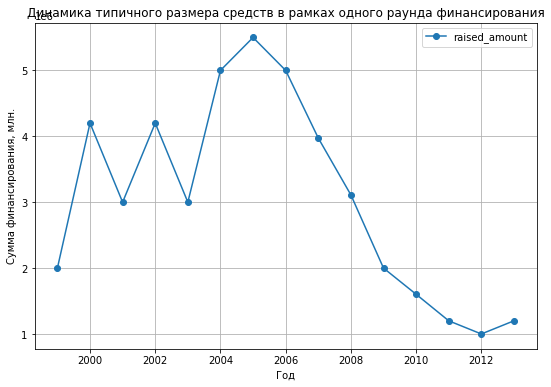

In [29]:
# Строим линейный график
pivot_table[pivot_table['funding_rounds']>50].plot(kind='line',  y='raised_amount', figsize=(9, 6), marker='o',)

# Настраиваем оси
plt.title('Динамика типичного размера средств в рамках одного раунда финансирования')
plt.xlabel('Год')
plt.ylabel('Сумма финансирования, млн.')
plt.legend(loc='upper right')
plt.grid()
plt.show()


Как видно из графика максимальное значение типичного размера собранных в рамках одного раунда средств наблюдалось в 2005 году. В 2013 году значение показателя незначительно выросло по сравнению с 2012 годом. Однако перед этим, начиная с 2005 года, размер средств неизменно снижался, в то время как количество раундов стабильно увеличивалось.


### 2.2. Люди и их образование

Для того, чтобы оценить долю сотрудников без информации об образовании необходимо объединить датафреймы `people_df` и `education_df`. Объединение необходимо осуществить с помощью метода `merge()`, Чтобы сохранить информацию о всех сотрудниках независимо от наличия у них образования, в качестве типа объединения будем использовать тип `left`. В качестве парметра объединения для датафрейма `people_df` будем использовать столбец `id`, для датафрейма `education_df` - столбец `person_id`. Присвоим имя `ed_of_people_df` новому датафрейму.

После объединения выведем информацию о новом датафрейме, а также его первые строки.

In [30]:
# Соединим данный в единый датафрейм:
ed_of_people_df = people_df.merge(education_df, left_on='id', right_on='person_id', how='left')

# Выведем информацию о объединённом датафрейме
ed_of_people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


In [31]:
# Выведем первые пять строк объединённого датафрейма
ed_of_people_df.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


Далее рассмотрим возможно ли присоединение к новому датафрейму датафрейма `degrees_df`. 

Присоединение необходимо осуществлять по столбцу `bject_id`. Однако данные в столбце записаны в формате `p:2351`, в связи с чем удалим набор символов `:` из каждой строки с помощью метода `str.replace`.

In [32]:
# Удалим лишние символы
degrees_df['object_id']=degrees_df['object_id'].str.replace('p:', '')

Выведем первые пять строк для оценки проведённых изменений. 

In [33]:
# Выведем первые пять строк датафрейма degrees_df
degrees_df.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


Как видно лишние символы успешно удалены.

Далее для корректного присоединения датафрейма необходимо скорректировать формат данных в столбце `object_id`. Скорректируем формат с помощью метода `to_numeric`.

In [34]:
# Скорректируем формат для столбца object_id
degrees_df['object_id'] = pd.to_numeric(degrees_df['object_id'], downcast='float')

Выведем информацию об обновлённом датафрейме `degrees_df`.

In [35]:
# Выведем информацию о датафрейме degrees_df
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           109610 non-null  int64  
 1   object_id    109610 non-null  float32
 2   degree_type  98392 non-null   object 
 3   subject      81298 non-null   object 
dtypes: float32(1), int64(1), object(2)
memory usage: 2.9+ MB


Как  видно формат успешно изменён.

Далее приступим к объединению датафрйемов. Чтобы сохранить информацию о всех сотрудниках в качестве типа объединения будем использовать тип `outer`. В качестве параметра объединения для датафрейма `ed_of_people_df` будем использовать столбец `id_y`, для датафрейма `degrees_df `- столбец `object_id`. Для нового датафрейма оставим имя `ed_of_people_df`.

In [36]:
# Присоединим к датафрейму ed_of_people_df датафрейм degrees_df
ed_of_people_df = ed_of_people_df.merge(degrees_df, left_on='id_y', right_on='object_id', how='outer')

Выведем информацию о сохранённом датафрйеме.

In [37]:
# Выедем информацию об обновлённом датафрейме
ed_of_people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353336 entries, 0 to 353335
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              281205 non-null  float64       
 1   first_name        281200 non-null  object        
 2   last_name         281204 non-null  object        
 3   company_id        48807 non-null   float64       
 4   network_username  55277 non-null   object        
 5   id_y              122567 non-null  float64       
 6   person_id         122567 non-null  float64       
 7   instituition      122508 non-null  object        
 8   graduated_at      65353 non-null   datetime64[ns]
 9   id                109610 non-null  float64       
 10  object_id         109610 non-null  float32       
 11  degree_type       98392 non-null   object        
 12  subject           81298 non-null   object        
dtypes: datetime64[ns](1), float32(1), float64(5), object(6)
mem

In [38]:
# Выведем первые пять строк обновлённого датафрейма
ed_of_people_df.head(10)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,id,object_id,degree_type,subject
0,10.0,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,NaN,NaN,NaN,NaN
1,100.0,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,1000.0,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,10000.0,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,100000.0,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
5,100002.0,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6,100009.0,Eddy,Badrina,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,100010.0,Michael,Dadashyan,NaN,fbroulette,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,100011.0,Jeff,Grell,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
9,100012.0,Nick,Bova,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


Далее для расчёта доли сотрудников, у которых отсутствует информацию об образовании, необходимо вывести столбец с признаком отсутствия/наличия информации об образовании.

В качестве данного критерия будем рассматривать наличие или отсутствие информации по столбцу `instituition`. Однако для создания функции, анализирующей соответствующий критерий, необходимо предварительно обработать пропуски в столбце. Т.к. столбец содержит текстовую информацию, заменим в нём пропуски на пустую строку.

In [39]:
# Заменим пропуски в столбце instituition
ed_of_people_df['instituition']=ed_of_people_df['instituition'].fillna('')

Далее создадим функцию, которая создаст новый столбец с бинарным признаком в зависимости от значения в столбце `instituition`.

In [40]:
# Создадим функцию с бинарным признаком в зависимости от наличия информации в столбце instituition 
def create_is_info_educ(x):
    if x=='':
        return True
    return False

В случае если в условии `if` срабатывает условие, что значение в строке равно пустой строке, то функция возвращает True, что означает, что информация об образовании отсутствует. Если в строке содержится другое значение, то функция возвращает False. Применим эту функцию к столбцу `instituition` и создадим новый столбец `is_not_info_educ`.

In [41]:
# Создаём столбец is_24_7 с помощью функции create_is_24_7
ed_of_people_df['is_not_info_educ'] = ed_of_people_df['instituition'].apply(create_is_info_educ)

Выведем первые пять строк обновленного датафрейма.

In [42]:
# Выведем первые пять строк обновленного датафрейма
ed_of_people_df.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,id,object_id,degree_type,subject,is_not_info_educ
0,10.0,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,NaN,NaN,NaN,NaN,False
1,100.0,Peter,Lester,27.0,NaN,NaN,NaN,,NaT,NaN,NaN,NaN,NaN,True
2,1000.0,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,,NaT,NaN,NaN,NaN,NaN,True
3,10000.0,Neil,Capel,2526.0,NaN,NaN,NaN,,NaT,NaN,NaN,NaN,NaN,True
4,100000.0,Sue,Pilsch,NaN,NaN,NaN,NaN,,NaT,NaN,NaN,NaN,NaN,True


Как видно из выгрузки функция работает корректно.

Далее сгруппируем данные датафрейма по компаниям. В качестве столбца, по которому будет осуществляться группировка, будем использовать столбец `company_id`. Для каждой компании рассчитаем общее количество сотрудников, а также количество сотрудников, по которым отсутствует информацию об образовании. Новому датафрейму присвоим имя `grouped`.

In [43]:
# Рассчитаем количество общей количество сотрудников и количество сотрудников, по которым отсутствует информацию об образовании
grouped=ed_of_people_df.groupby('company_id').agg({'id_x':'count','is_not_info_educ': 'sum'})
print(grouped)

            id_x  is_not_info_educ
company_id                        
1.0            3                 1
2.0            1                 0
3.0            5                 1
4.0           22                 1
5.0           91                16
...          ...               ...
285897.0       2                 0
285953.0       1                 1
285972.0       2                 1
285996.0       1                 0
286091.0       7                 2

[22922 rows x 2 columns]


Далее выведем новый столбец с долей сотрудников, у которых отсутствует информация о образовании. Столбцу присвоим имя `info_ed_share`.

In [44]:
# Выведем столбец с долей сотрудников, у которых отсутствует информацию об образовании
grouped['info_ed_share']=grouped['is_not_info_educ']/grouped['id_x']*100
print(grouped)

            id_x  is_not_info_educ  info_ed_share
company_id                                       
1.0            3                 1      33.333333
2.0            1                 0       0.000000
3.0            5                 1      20.000000
4.0           22                 1       4.545455
5.0           91                16      17.582418
...          ...               ...            ...
285897.0       2                 0       0.000000
285953.0       1                 1     100.000000
285972.0       2                 1      50.000000
285996.0       1                 0       0.000000
286091.0       7                 2      28.571429

[22922 rows x 3 columns]


Далее необходимо разделить все компании на несколько групп по количеству сотрудников. Для этого воспользуемся методом `value_counts()`.

In [45]:
# Выведем возможные значения по количеству сотрудников
grouped['id_x'].value_counts().sort_values(ascending=False)

1      13518
2       4488
3       2078
4       1084
5        583
6        335
7        222
8        146
9        102
10        79
11        55
12        40
13        33
16        17
17        17
15        16
14        15
18        12
20         9
21         9
19         7
22         7
29         5
23         5
28         3
30         2
24         2
27         2
31         2
68         1
89         1
84         1
58         1
42         1
26         1
37         1
40         1
41         1
25         1
53         1
437        1
262        1
119        1
32         1
91         1
36         1
83         1
92         1
51         1
226        1
45         1
77         1
66         1
34         1
46         1
49         1
43         1
71         1
Name: id_x, dtype: int64

Как видно из выгрузки, в большинстве компаний числится один сотрудник. Далее по мере увеличения количества сотрудников, количество компаний снижается. Значительное количество компаний имеют по 2 и 3 сотрудника. Затем количество компаний, имеющих в штате более 3 сотрудников значительно сокращается, в связи с чем объединим в одну группу компании с количеством сотрудников от 4 до 9 включительно. В следующую группу включим компании с числом работников от 10 до 20 включительно. В последнюю группу войдут компании, в которых числится более 20 работников.

In [46]:
# Разделим компании по количеству работников
grouped['people_quantity_group'] = pd.cut(grouped['id_x'], bins=[0, 1, 2, 3, 9, 20, 437], labels=["1", "2", "3", "4-9", "10-20", "21+"])

# Выведем первые десять строк обновлённого датафрейма.
grouped.head(10)

,id_x,is_not_info_educ,info_ed_share,people_quantity_group
company_id,,,,
1.0,3,1,33.333333,3
2.0,1,0,0.000000,1
3.0,5,1,20.000000,4-9
4.0,22,1,4.545455,21+
5.0,91,16,17.582418,21+
8.0,3,3,100.000000,3
9.0,1,0,0.000000,1
10.0,4,1,25.000000,4-9
11.0,5,1,20.000000,4-9


Далее для каждой группы выведем среднюю долю сотрудников, не имеющих информацию об образовании.

In [47]:
# Для каждой группы выведем среднюю долю сотрудников, не имеющих информацию об образовании
grouped.groupby('people_quantity_group').agg({'people_quantity_group':'count', 'info_ed_share': 'mean'})

,people_quantity_group,info_ed_share
people_quantity_group,,
1,13518,62.050599
2,4488,23.028075
3,2078,19.666346
4-9,2472,22.051308
10-20,300,26.889136
21+,66,18.465459


Как видно из выгрузки, наибольшей долей сотрудников без информации обладают компании с одним сотрудником - более 59%. Для компаний с двумя и тремя сотрудниками величина показателя существенно ниже - 21,8% и 27,4% соответственно. Наименьшей долей обладают компании с числом сотрудников более 20 - 18,5%.

### 2.3. Анализ датасетов на возможность объединения

Столбец `network_username` содержится в датасетах `company_and_rounds.csv` и `people.csv`. Выведем первые 10 для обоих датасетов.

In [49]:
# Выведем первые десять строк датафрейма comp_df
comp_df.head(10)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_fund,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year_funded
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Выведем первые десять строк датафрейма people_df
people_df.head(10)

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN
6,100006,Courtney,Homer,81558.0,jobsbostontech
7,100009,Eddy,Badrina,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette
9,100011,Jeff,Grell,NaN,NaN


Далее рассмотрим количество уникальных значений по столбцу `network_username` для обоих датафреймов.

In [51]:
# Выведем уникальные значения по столбцу network_username для обоих датафреймов
print('Количество уникальных значений по столбцу network_username датафрейма comp_df:')
print(comp_df['network_username'].nunique())
print('Количество уникальных значений по столбцу network_username датафрейма people_df:')
print(people_df['network_username'].nunique())

Количество уникальных значений по столбцу network_username датафрейма comp_df:
79571
Количество уникальных значений по столбцу network_username датафрейма people_df:
38421


Количество уникальных значений по столбцу `network_username` датафрейма `comp_df` составляет 79 571, в то время как для датафрейма `people_df` - 38 421, что свидетельствует о том, что не для всех компаний, имеющих ник в социальных сетях удастся подобрать информацию о сотрудниках.

Далее проанализируем сколько уникальных значений столбца `network_username` датафрейма `comp_df` пересекаются с уникальными значениями датафрейма `people_df`. Для этого создадим два списка с уникальными значениями для каждого датафрейма.

In [52]:
# Выведем уникальные значения по столбцу network_username датафрейма comp_df
uniq_comp=comp_df['network_username'].unique()
print(uniq_comp)

['BachelrWetpaint' nan 'Hostnine' ... 'networkzend' 'pPhotonet' 'Photonet']


In [53]:
# Выведем уникальные значения по столбцу network_username датафрейма people_df
uniq_people=people_df['network_username'].unique()
print(uniq_people)

[nan 'jobsbostontech' 'fbroulette' ... 'itechsocialnet' 'socialnethubs'
 'esocialnetlike']


Далее посчитаем количество совпадений уникальных значений для обоих датафреймов. Для этого восопльзуемся методом `intersection()`.

In [54]:
# Посчитаем количество совпадений уникальных значений для обоих датафреймов
df=set(uniq_comp).intersection(uniq_people)
len(df)

2200

Как видно, число совпадений составляет 2200. Таким образом, столбцы с именем `network_username` можно использовать для объединения данных, однако число пересечений по данному столбцу окажется крайне низким относительно общего количества уникальных значений для обоих датафреймов.


### 2.4. Проблемный датасет и причина возникновения пропусков

Для начала выведем первые 20 строк датасета `company_and_rounds.csv` и общую информацию о нём.

In [55]:
# Выведем первые 20 строк датасета
comp_df.head(20)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_fund,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year_funded
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Выведем общую информацию о датасте
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

Значительное количество пропусков в столбцах с информацией по раундам может объясняться тем, что данная информация содержалась изначально в отдельном датасете, о чём может свидетельствовать совпадающее количество пропусков для группы столбцов, содержащих информацию о компаниях, и аналогичная ситуация среди столбцов с информацией о раундах финансирования. При этом соединение изначальных датасетов происходило по столбцам `company_id` и `company_id_fund`.

Чтобы сделать датафрейм более удобным для восприятия, сократить количество пропусков и повторяющиеся строки, в качестве оптимального варианта можно рассмтотреть разделение текущего датафрейма `comp_df` на два отдельных датафрейма `new_comp_df` и `rounds_df`, содержащих информацию исключительно о компаниях и раундах финансирования соответственно.

Для этого для каждого нового датафрйема необходимо отобрать столбцы, относящиеся исключительно к компаниям или раундам. Выведем для начала новый датафрейм `new_comp_df` с информацией о компаниях.

In [57]:
# Создаём датафрейм с информацией о компаниях
new_comp_df=comp_df[['company_id', 'name', 'category_code', 'status', 'founded_at', 
                     'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds',
                    'funding_rounds', 'funding_total', 'milestones']]

# Выведем первые десять строк нового датафрейма
new_comp_df.head(10)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,0.0,0.0,0.0
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,0.0,0.0,0.0
9,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,0.0,0.0,1.0


In [58]:
# Выведем информацию о новом датафрейме
new_comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


Как видно из выгрузки, для компаний, содержащих информацию о финансировании более чем в одном раунде, информация о компаниях продублировалась. Чтобы оптимизировать новый датафрейм, необходимо удалить из него дубликаты с помощью метода `drop_duplicates()`. Скорректированному датафрейму присвоим название `new_comp_df_cleaned`.

In [59]:
# Удаляем дубликаты из датафрейма new_comp_df
new_comp_df_cleaned = new_comp_df.drop_duplicates()

# Выведем первые 10 строк нового датафрейма
new_comp_df_cleaned.head(10)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,0.0,0.0,0.0
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,0.0,0.0,0.0
9,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,0.0,0.0,1.0
10,10005.0,Thomas Publishing,advertising,operating,NaT,NaT,thomaspublishing.com,NaN,USA,0.0,0.0,0.0,1.0
11,100062.0,Vetter Idea Management System,enterprise,operating,2011-08-01,NaT,getvetter.com,getvetter,NaN,0.0,0.0,0.0,1.0


In [60]:
# Выведем информацию о новом датафрейме
new_comp_df_cleaned.info()
print((len(new_comp_df_cleaned)-len(new_comp_df))/len(new_comp_df)*100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


Как видно из выгрузки добирающаяся информация о компаниях была удалена и объём датафрейма сократился до 196 554 записей или на 9,7%.

Далее сформируем новый датафрейм с информацией исключительно о раундах финансирования. Новому датафрейму присвоим имя `rounds_df`.

In [61]:
# Сформируем новый датафрейм с информацией о раундах финансирования
rounds_df=comp_df[['funding_round_id', 'company_id_fund', 'funded_at', 'funding_round_type', 'raised_amount', 
                     'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']]

# Выведем первые десять строк нового датафрейма
rounds_df.head(10)

,funding_round_id,company_id_fund,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#Выведем информацию о датафрейме rounds_df
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id_fund      52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 15.0+ MB


Из выгрузки видно, что новый датафрейм был сформирован, однако в нём осталось значительное количество пропусков, перенёсшихся из предыдущего датафрейма `comp_df`.

Удалим данные пропуски с помощью метода `dropna()`. В качестве столбца, по которому будет осуществляться удаление, будем использовать столбец `funding_round_id`, поскольку именно данный столбец должен содержать все все уникальные записи раундов финансирования изначального датафрейма. Новому датафрейму присвоим название `rounds_df_cleaned`.

In [63]:
# Удаляем пропуски из нового датафрейма
rounds_df_cleaned=rounds_df.dropna(subset=['funding_round_id'])

# Выведем первые десять строк нового датафрейма
rounds_df_cleaned.head(10)

,funding_round_id,company_id_fund,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
15,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0
20,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0
21,3619.0,10015.0,2008-10-10,series-a,2000000.0,0.0,2.0,0.0,1.0
22,18213.0,10015.0,2010-09-10,series-b,9000000.0,0.0,4.0,0.0,0.0
23,27747.0,10015.0,2012-01-24,series-c+,12000000.0,0.0,4.0,0.0,0.0
24,45409.0,10015.0,2013-08-13,series-c+,43000000.0,0.0,5.0,1.0,0.0
25,54006.0,10015.0,2012-01-01,venture,2069200.0,0.0,4.0,0.0,0.0


In [64]:
#Выведем информацию о датафрейме rounds_df_cleaned
print(rounds_df_cleaned.info())
print(len(rounds_df)/len(rounds_df_cleaned))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52928 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id_fund      52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.0+ MB
None
4.114532950423216


Из выгрузки нового датафрейма видно, что пропущенные значения были удалены, количество записей сократилось в 4,11 раза.

### Промежуточный вывод

Таким образом,  в данном разделе проведены предварительные предобработка и исследование данных. В ходе чего было выявлено, что:
 - Максимальное значение типичного размера собранных в рамках одного раунда средств наблюдалось в 2005 году. В 2013 году значение показателя незначительно выросло по сравнению с 2012 годом. Однако перед этим, начиная с 2005 года, размер средств неизменно снижался, в то время как количество раундов стабильно увеличивалось.
 - Наибольшей долей сотрудников без информации обладают компании с одним сотрудником - более 59%. Для компаний с двумя и тремя сотрудниками величина показателя существенно ниже - 21,8% и 27,4% соответственно. Наименьшей долей обладают компании с числом сотрудников более 20 - 18,5%. Также было выявлено, что к таблицам `people.csv` и `education.csv` можно также присоединить `degrees.csv`, используя столбец `object_id`, предварительно скорректировав в нём формат данных.
 - Столбцы с именем `network_username` можно использовать для объединения данных, однако число пересечений по данному столбцу окажется крайне низким относительно общего количества уникальных значений для  датафреймов `comp_df` и `people_df`.
 - Исследование датасета `company_and_rounds.csv` показало, что с большей долей вероятности данный датасет был объединён по столбцам `company_id` и `company_id_fund` из двух отдельных датасетов, содержащих информацию о компаниях и раундах финансирования. Для более удобного дальнейшего анализа оптимальным вариантом может служить разделение датафрейма на два отдельных с соответствующей информацией. Однако после разделения необходимо обработать получившиеся датасеты, в том числе удалить пропуски и дубликаты.


## Шаг 3. Исследовательский анализ объединённых таблиц


### 3.1. Объединение данных

Для формирования таблицы с нужными нам для дальнейшего анализа проведём фильтрацию для датафрейма `new_comp_df_cleaned` по следующим условиям:
 - `funding_rounds`>0,
 или
 - `investment_rounds`>0,
 или
 - `status`=`acquired`
 
Новому датафрейму присвоим имя  `comp_for_inv_df`.

In [65]:
# Создадим новый датафрейм, отфильтровав по условиям данные из датафрейма new_comp_df_cleaned
comp_for_inv_df=new_comp_df_cleaned[(new_comp_df_cleaned['funding_rounds']>0)|
                                    (new_comp_df_cleaned['investment_rounds']>0)|
                                   (new_comp_df_cleaned['status']=='acquired')]

Выгрузим первые десять строк нового датафрейма, а также общую информацию.

In [66]:
# Выгрузим первые десять строк датафрейма comp_for_inv_df
comp_for_inv_df.head(10)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0
21,10015.0,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.0,5.0,68069200.0,0.0
26,100155.0,MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,USA,0.0,3.0,10125300.0,1.0
32,10018.0,Demandbase,analytics,operating,2006-01-01,NaT,demandbase.com,Demandbase,USA,0.0,3.0,33000000.0,3.0
36,100189.0,Locatrix Communications,mobile,operating,2003-11-01,NaT,locatrix.com,NaN,AUS,0.0,1.0,250000.0,1.0
37,10020.0,Threebrix E-services Pvt Ltd,NaN,operating,NaT,NaT,NaN,NaN,NaN,1.0,0.0,0.0,0.0


In [67]:
# Выгрузим общую информацию о датафрейме comp_for_inv_df
comp_for_inv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

Как видно из выгрузки, новый датафрейм содержит 40 747 записей, что свидетельствует о том, что данные были отфильтрованы корректно.


### 3.2. Анализ выбросов

Выведем статистические показатели для столбца `funding_total` с помощью метода `describe()`.

In [68]:
# Выведем статистические показатели для столбца funding_total с помощью метода describe()
comp_for_inv_df['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

Как видно из выгрузки, по причине значительного размаха данных, показатели имеют неподходящий для анализа формат. В связи с чем выведем статистические показатели по параметру отдельно.  

In [69]:
# Выводим статистические показатели по параметру funding_total
print('min:')
print(comp_for_inv_df['funding_total'].min())
print('max:')
print(comp_for_inv_df['funding_total'].max())
print('std:')
print(comp_for_inv_df['funding_total'].std())
print('mean:')
print(comp_for_inv_df['funding_total'].mean())
print('median:')
print(comp_for_inv_df['funding_total'].median())

min:
0.0
max:
5700000000.0
std:
56464359.977256276
mean:
10135609.636733992
median:
600000.0


Как видно из выгрузки наблюдается значительный размах данных, а также существенная разница между медианой и средним значением, и, как следствие, значительная величина стандартного отклонения.

Далее приведём визуализацию распределения общего объёма финансирования с помощью гистограммы распределения.

Text(0, 0.5, 'Частота')

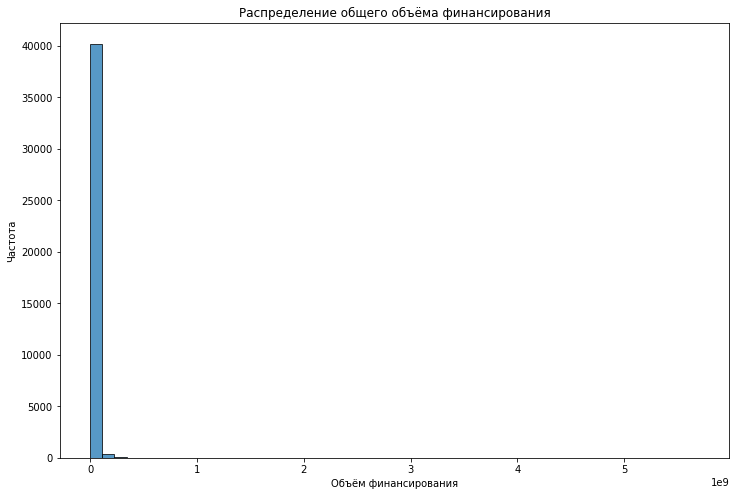

In [70]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 8))

# Строим гистограмму с помощью pandas через plot(kind='hist')
comp_for_inv_df['funding_total'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.75,
                edgecolor='black',
                rot=0)

# Настраиваем оформление графика
plt.title('Распределение общего объёма финансирования')
plt.xlabel('Объём финансирования')
plt.ylabel('Частота')


Как видно из получившейся гистограммы, распределение отражено недостаточно наглядно для дальнейшей оценки. В связи с чем построим аналогичный график с помощью логарифмической шкалы.

Text(0, 0.5, 'Частота')

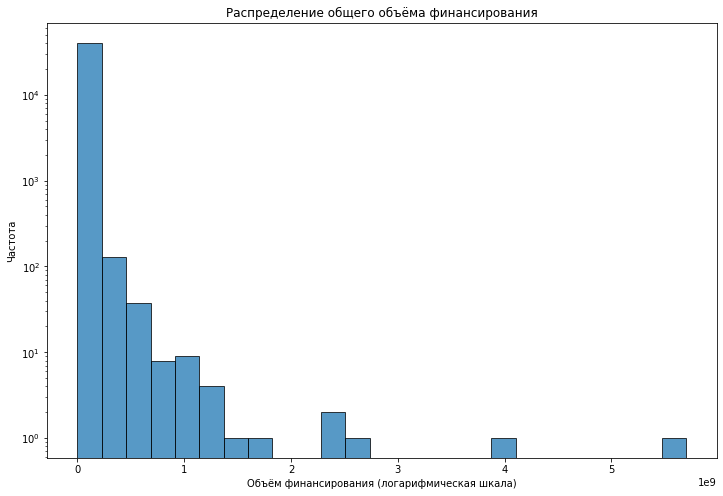

In [71]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 8))

# Строим гистограмму с помощью pandas через plot(kind='hist')
comp_for_inv_df['funding_total'].plot(
                kind='hist', 
                bins=25, 
                alpha=0.75,
                edgecolor='black',
                rot=0, 
                log=True
)

# Настраиваем оформление графика
plt.title('Распределение общего объёма финансирования')
plt.xlabel('Объём финансирования (логарифмическая шкала)')
plt.ylabel('Частота')


Как видно из гистограммы, верхняя граница объёма финансирования составляет приблизительно 1,8 le9, далее следует обрыв данных. Показатели финансирования, находящиеся выше данного значения могут считаться выбросами.


### 3.3. Анализ компаний, проданных за бесплатно

Для анализа компаний, проданных за ноль или один доллар, необходимо объединить датасеты comp_for_inv_df и acq_df. Объединение будем осуществлять с помощью `how='left'`, в качестве парметров объединения будем использовать `company_id` и `acquired_company_id`. Объединённому датафрейму присвоим название `buy_0_1_df`.

In [72]:
# Объединим датафреймы comp_for_inv_df и rounds_df_cleaned
buy_0_1_df=comp_for_inv_df.merge(acq_df, how='left', left_on='company_id', right_on='acquired_company_id')

# Выведем полученный датафрейм
print(buy_0_1_df.head())
print(buy_0_1_df.info())

   company_id        name category_code     status founded_at closed_at  \
0         1.0    Wetpaint           web  operating 2005-10-17       NaT   
1        10.0     Flektor   games_video   acquired        NaT       NaT   
2       100.0       There   games_video   acquired        NaT       NaT   
3      1001.0  FriendFeed           web   acquired 2007-10-01       NaT   
4     10014.0     Mobclix        mobile   acquired 2008-03-01       NaT   

             domain network_username country_code  investment_rounds  \
0  wetpaint-inc.com  BachelrWetpaint          USA                0.0   
1       flektor.com              NaN          USA                0.0   
2         there.com              NaN          USA                0.0   
3    friendfeed.com       friendfeed          USA                0.0   
4       mobclix.com          mobclix          USA                0.0   

   funding_rounds  funding_total  milestones      id  acquiring_company_id  \
0             3.0     39750000.0      

Далее проведём фильтрацию полученного датафрейма по условиям, что компании были приобретены за 0 или 1 доллар, при этом сумма финансирования не равна нулю.

In [73]:
# Создадим новый датафрейм, отфильтровав по условиям данные из датафрейма new_comp_df_cleaned
buy_0_1_df_filtered=buy_0_1_df[(buy_0_1_df['funding_total']!=0)&(
                                    (buy_0_1_df['price_amount']==0)|
                                   (buy_0_1_df['price_amount']==1))]
buy_0_1_df_filtered

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
25,10054.0,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.0,7.0,121500000.0,3.0,9288.0,23283.0,10054.0,cash_and_stock,0.0,2013-08-13
63,101312.0,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.0,3.0,4000000.0,2.0,9653.0,11391.0,101312.0,NaN,0.0,2013-09-18
66,101340.0,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.0,1.0,250000.0,1.0,7272.0,1972.0,101340.0,NaN,0.0,2012-06-18
67,10137.0,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.0,3.0,1310000.0,2.0,8254.0,757.0,10137.0,cash_and_stock,0.0,2012-11-05
68,10139.0,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.0,2.0,44925000.0,1.0,9326.0,44008.0,10139.0,NaN,0.0,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,99.0,Amie Street,web,acquired,2011-07-04,NaT,amiestreet.com,amiestreet_logs,USA,0.0,2.0,3900000.0,0.0,7024.0,317.0,99.0,NaN,0.0,2010-09-22
40836,9905.0,UBmatrix,software,acquired,2005-01-01,NaT,ubmatrix.com,NaN,USA,0.0,2.0,5172350.0,0.0,3381.0,41119.0,9905.0,NaN,0.0,2010-06-24
40840,992.0,wunderloop,advertising,acquired,1999-01-01,NaT,wunderloop.com,NaN,USA,0.0,1.0,10000000.0,1.0,9916.0,19182.0,992.0,NaN,0.0,2010-07-02
40854,997.0,Zimbra,enterprise,acquired,2003-01-01,NaT,zimbra.com,zimbra,USA,0.0,1.0,14500000.0,3.0,9121.0,415.0,997.0,NaN,0.0,2013-07-15


In [74]:
# Выведем характеристики компаний
print(buy_0_1_df_filtered['price_amount'].value_counts())
print(buy_0_1_df_filtered['status'].value_counts())
print(buy_0_1_df_filtered['country_code'].value_counts())

0.0    1618
Name: price_amount, dtype: int64
acquired    1618
Name: status, dtype: int64
USA    1236
GBR      64
CAN      46
DEU      31
ISR      27
FRA      24
IRL      11
DNK       9
SWE       8
IND       7
ESP       7
ITA       6
CHE       6
FIN       6
JPN       5
NLD       5
NOR       4
CHN       4
ARG       4
BEL       4
AUT       3
SGP       3
BGR       2
AUS       2
BRA       1
CZE       1
HKG       1
RUS       1
HUN       1
KOR       1
THA       1
TUR       1
URY       1
CHL       1
POL       1
UMI       1
Name: country_code, dtype: int64


Как видно, все компании, попавшие в датафрейм были проданы за 0 долларов и имеют статус `acquired`.

Далее рассчитаем границы выбросов для столбца `funding_total`. Для этого построим гистограмму распределения по данному столбцу.

Text(0, 0.5, 'Частота')

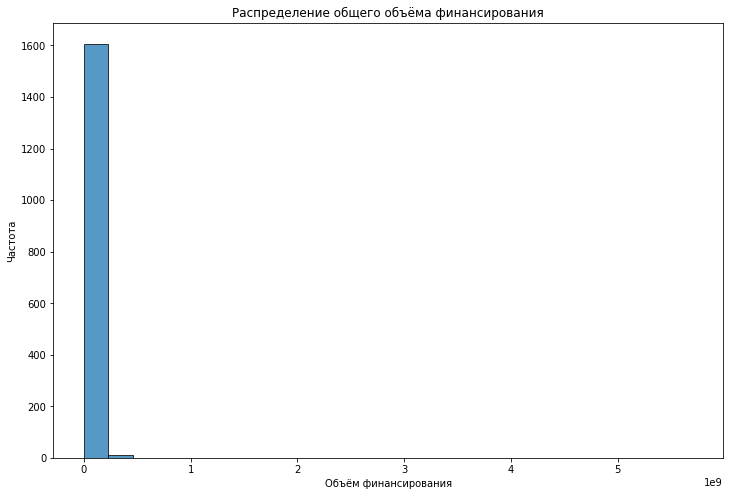

In [75]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 8))

# Строим гистограмму с помощью pandas через plot(kind='hist')
buy_0_1_df_filtered['funding_total'].plot(
                kind='hist', 
                bins=25, 
                alpha=0.75,
                edgecolor='black',
                rot=0
                
)

# Настраиваем оформление графика
plt.title('Распределение общего объёма финансирования')
plt.xlabel('Объём финансирования')
plt.ylabel('Частота')

Как видно из визуализации, нижняя граница выбросов находится около 0, в то время как значение процентиля для верхней границы оценить сложно.

В связи с чем определим верхнюю границу с помощью расчёта показателя IQR.

In [76]:
# Определим первый процентиль
Q1=buy_0_1_df_filtered['funding_total'].quantile(0.25)

# # Определим второй процентиль
Q3=buy_0_1_df_filtered['funding_total'].quantile(0.75)

# Рассчитаем межквартильный размах IQR
IQR=Q3-Q1

# Рассчитаем верхнюю границу выбросов
high_point=Q3+1.5*IQR

print('Верхняя граница:')
print(high_point)

Верхняя граница:
35750000.0


Определим подбором процентиль, при котором значение параметра будет соответствовать верхней границе.

In [77]:
buy_0_1_df_filtered['funding_total'].quantile(0.91)

35894000.00000001

В результате верхняя граница выбросов приблизительно соответствует 91-ому процентилю.


### 3.4. Цены стартапов по категориям

   Для того, чтобы оценить категории стартапов с типично высокими ценами, а также стартапы с наибольшим разбросом цен, рассмтрим сфорисированный раннее датафрейм `buy_0_1_df`. При этом для более достоверных данных, исключим из него компании, приобретённые за 0 долларов. Присвоим новому датафрйему название `high_price_comp_df`.

In [78]:
# Создадим датафрейм без учёта компаний, купленных за один доллар
high_price_comp_df=buy_0_1_df[(buy_0_1_df['price_amount']!=0)]
high_price_comp_df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,2.000000e+07,2007-05-30
3,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901.0,5.0,1001.0,cash_and_stock,4.750000e+07,2009-08-10
5,10015.0,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.0,5.0,68069200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
6,100155.0,MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,USA,0.0,3.0,10125300.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40885,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
40886,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT
40887,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0,NaN,NaN,NaN,NaN,NaN,NaT
40888,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0,NaN,NaN,NaN,NaN,NaN,NaT


Цены будем оценивать по столбцу `price_amount`. Для начала выведем основные статистические показатели по параметру.

In [79]:
# Выводим статистические показатели по параметру raised_amount
print('min:')
print(high_price_comp_df['price_amount'].min())
print('max:')
print(high_price_comp_df['price_amount'].max())
print('std:')
print(high_price_comp_df['price_amount'].std())
print('mean:')
print(high_price_comp_df['price_amount'].mean())
print('median:')
print(high_price_comp_df['price_amount'].median())

min:
1.0
max:
2600000000000.0
std:
52304386698.95197
mean:
1495976014.747675
median:
56000000.0


Как видно из выгрузки наблюдается значительная разница между показателями среднего значения и медианы параметра, а также достаточно высокая величина стандартного отклонения. В связи с чем для оценки категорий стартапов с типично высокими ценами оптимальным вариантом будет использовать медиану. Для оценки категорий стартапов с наибольшим разбросом цен рассмотрим показатель стандартного отклонения.

Для начала выведем категории стартапов с типично наиболее высокими ценами.

In [80]:
# Выведем категории стартапов с типично наиболее высокими ценами
category_by_median=high_price_comp_df.groupby('category_code')['price_amount'].median().sort_values(ascending=False)
print(category_by_median)

category_code
automotive          2.400000e+09
sports              6.225000e+08
nanotech            5.840000e+08
real_estate         4.000000e+08
manufacturing       3.510000e+08
transportation      2.300000e+08
biotech             2.000000e+08
analytics           2.000000e+08
fashion             1.950000e+08
cleantech           1.850000e+08
finance             1.715000e+08
medical             1.650000e+08
security            1.645000e+08
ecommerce           1.575000e+08
health              1.400000e+08
public_relations    1.100000e+08
network_hosting     1.025000e+08
messaging           1.000000e+08
semiconductor       1.000000e+08
search              9.000000e+07
hardware            7.600000e+07
other               7.155000e+07
travel              6.250000e+07
advertising         6.000000e+07
games_video         5.825000e+07
hospitality         5.750000e+07
mobile              5.600000e+07
web                 5.550000e+07
enterprise          5.475000e+07
photo_video         5.000000e

Далее выведем линейчатую диаграмму с топ-15 категорий стартапов с наиболее высоким ценами.

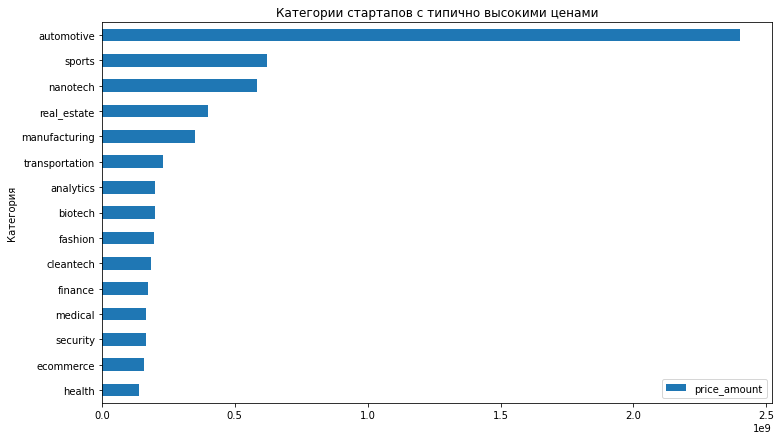

In [81]:
# Выведем линейчатую диаграмму с категориями стартапов с наиболее типично высокими ценами

category_by_median.head(15).sort_values(ascending=True).plot(kind='barh',
               title=f'Категории стартапов с типично высокими ценами',
               legend=True,
               ylabel='Сумма финансирования',
               xlabel='Категория',
               rot=0,
               figsize=(12, 7))


plt.legend()

Как видно из выгрузки, как правило, наиболее типично высокими ценами обладают стартапы категорий `automotive`, `sports` и  `nanotech`.

Далее выведем категории стартапов с набольшим разбросом в цене.

In [82]:
# Выведем категории стартапов с набольшим разбросом в цене
category_by_std=high_price_comp_df.groupby('category_code')['price_amount'].std().sort_values(ascending=False)
print(category_by_std)

category_code
enterprise          2.413581e+11
public_relations    6.854338e+09
real_estate         2.676302e+09
automotive          2.581669e+09
other               2.060861e+09
biotech             1.968195e+09
health              1.927100e+09
games_video         1.463478e+09
security            1.378442e+09
mobile              1.319472e+09
software            1.204059e+09
semiconductor       1.122025e+09
manufacturing       1.060435e+09
finance             1.052920e+09
consulting          1.018109e+09
cleantech           8.744196e+08
hospitality         7.906006e+08
web                 6.954405e+08
network_hosting     6.769568e+08
hardware            6.450874e+08
transportation      5.726255e+08
sports              5.126524e+08
advertising         4.954839e+08
photo_video         4.311422e+08
search              3.395802e+08
education           2.883294e+08
ecommerce           2.814255e+08
medical             1.659058e+08
music               1.599781e+08
news                1.008553e

Дополнительно выведем визуализацию категорий стартапов. Как и в случае с топом уровню цен, выведем топ-15 категорий.

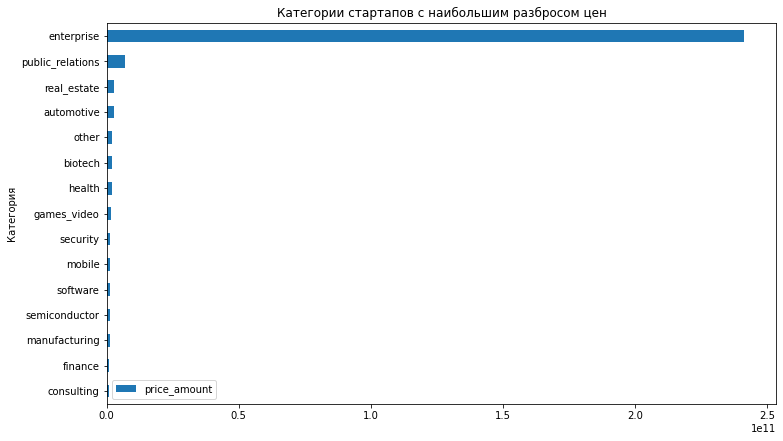

In [83]:
# Выведем визуализацию категорию стартапов с наибольшим разбросом цен
category_by_std.head(15).sort_values(ascending=True).plot(kind='barh',
               title=f'Категории стартапов с наибольшим разбросом цен',
               legend=True,
               ylabel='Стандартное отклонение',
               xlabel='Категория',
               rot=0,
               figsize=(12, 7))


plt.legend()

Как видно из выгрузки, наибольшим разбором цен среди всех категорий страртапов обладают стартапы категории `enterprise`.


### 3.5. Сколько раундов продержится стартап перед покупкой

Выведем статистические показатели по столбце `funding_rounds`.

In [84]:
# Выведем статистические показатели для столбца funding_rounds
comp_for_inv_df['funding_rounds'].describe()

count    40747.000000
mean         1.291531
std          1.264604
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

Как видно из выгрузки показатель среднее значение количества раундов находится достаточно близко к медиане параметра, что свидетельствует о том, что для оценки типичного значения количества раундов для каждого возможного статуса стартапа можно использовать среднее значение.

Далее выведем среднее количество раундов финансирования для каждой статуса стартапов.

In [85]:
# Выведем среднее количество раундов финансирования для каждой категории стартапов
funding_rounds_by_status=comp_for_inv_df.groupby('status')['funding_rounds'].mean().sort_values(ascending=False)
print(funding_rounds_by_status)

status
ipo          1.934375
operating    1.522658
closed       1.381453
acquired     0.523526
Name: funding_rounds, dtype: float64


Как видно из выгрузки, наибольшее количество раундов характерно для статуса `ipo`, наименьшее - для статуса `acquired`.

Дополнительно на наглядности приведём полученные значения на столбчатой диаграмме.

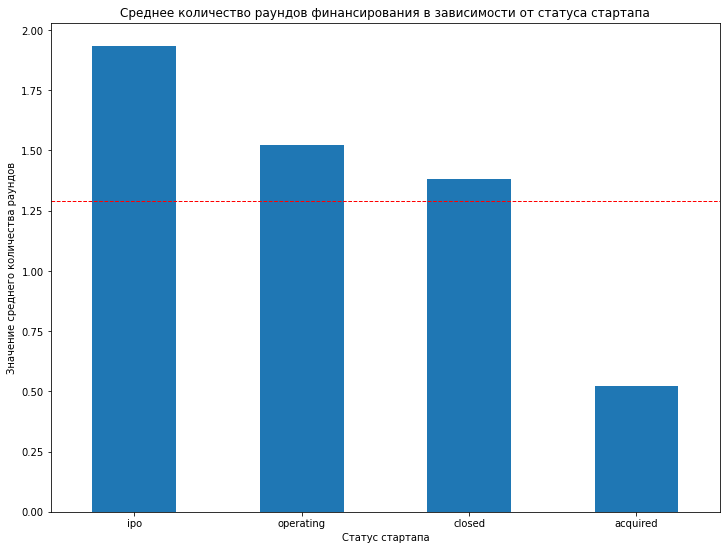

In [86]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 9))


# Строим столбчатую диаграмму с помощью pandas через plot(kind='barh')
funding_rounds_by_status.plot(
               kind='bar', 
               rot=0, 
               legend=False,
               title=f'Среднее количество раундов финансирования в зависимости от статуса стартапа'
)

# Настраиваем оформление графика
plt.xlabel('Статус стартапа')
plt.ylabel('Значение среднего количества раундов')

# Рассчитываем среднее значение количества раундов вне зависимости от статуса
mean_funding_rounds = comp_for_inv_df['funding_rounds'].mean()

# Наносим на график линию с средним значением количества раундов вне зависимости от статуса
plt.axhline(mean_funding_rounds, 
            color='red', 
            linestyle='--', 
            linewidth=1, 
            )

# Выводим график
plt.show()

На диаграмме наглядно видно, что наибольшее количество раундов характерно для статуса `ipo`, наименьшее - для статуса `acquired`. При этом для старптапов со статусами `ipo`, `operating`  и `closed` среднее количество раундов финансирования превосходит среднее значение по всей выборке данных.

### Промежуточный вывод

Таким образом , в данном разделе был сформирован новый датафрейм с компаниями, которые меняли или готовы менять владельцев. В качестве условий были указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. Размер итогового датасета составил 40 747 записей.

Также графическим способом была проведена оценка, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.  Верхняя граница объёма финансирования составляет приблизительно 1,8 le9, значения выще можно отнестик выбросам.

Далее были рассмотрены компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования, а также рассчитаны верхняя и нижняя границы выбросов для столбца `funding_total`. В результате, было установлено, что верхняя граница соответствует 91 процентилю.

В следующем подразделе были выявлены категории стартапов с типично высокими ценами, а также с наибольшим разбросом цен за стартап. В результате было установлено, что наиболее типично высокими ценами обладают стартапы категорий `automotive`, `sports` и  `nanotech`, наибольшим разбором цен среди всех категорий страртапов обладают стартапы категории `enterprise`.

Далее было определено типичное значение количества раундов для каждого возможного статуса стартапа. Наибольшее количество раундов характерно для статуса `ipo`, наименьшее - для статуса `acquired`.


## Шаг 4. Итоговый вывод и рекомендации

</i>Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.</i>

### 1. Общий обзор проделанной работы.

Таким образом, в ходе данного исследования был проведён исследовательский анализ набора датасетов, содержащих информацию о покупке стартапов, подготовка ответов на вопросы заказчика, как о предобработке, так и о значении данных для бизнеса. В качестве источников данных были использованы пять датасетов: `acquisition.csv`, `company_and_rounds.csv`, `education.csv`, `people.csv`, `degrees.csv`. Данные включали информацию о покупках одними компаниями других компаний,  информацию о компаниях и раундах финансирования, информацию об образовании сотрудника, информацию о сотрудниках,  информацию о типе образования сотрудника. 

В ходе исследования была проведена предобработка данных, а также составлена сводная таблица по годам, на основе которой определён был год, в котором типичный размер собранных в рамках одного раунда средств был максимален, рассмотрена тенденция по количеству раундов и выделяемых в рамках каждого раунда средств.
Далее была проведен анализ полноты информации об образовании сотрудников, рассмотрено подходит ли столбец столбцы с именем `network_username` для объединения данных. На заключительном этапе предобработки датафрейм `company_and_rounds.csv` был поделён на два  датафрейма, содержащих отдельно информацию о компаниях и раундах финасирования.

Далее в ходе непосредственно анализа был сформирован новый датафрейм с компаниями, которые меняли или готовы менять владельцев. Далее по столбцу `funding_total` графическим способом была проведена оценка, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. На следующем этапе были рассмотрены компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования. Также были определены категории стартапов с наиболее высокими типичными ценами и с наибольшим разбросом цен за стартап. На заключительном этапе анализа были выявлены типичные значения количества раундов для каждого возможного статуса стартапа.


### 2. Ответы на исследовательские вопросы, или главные выводы.

В ходе исследовательского анализа было выявлено, что столбцы с именем `network_username` можно использовать для объединения данных, однако число пересечений по данному столбцу окажется крайне низким относительно общего количества уникальных значений для обоих датафреймов. В ходе анализа датафреймы people_df и education_df были объединены по столбцам `id` и `person_id` соответственно. Также были объединены датафтреймы `ed_of_people_df` и `degrees_df` по столбцам `id_y` и `object_id`соответственно. Далее были объелинены датафреймы `comp_for_inv_df` .и `acq_df` по столбцам `company_id` `acquired_company_id`.

Также было установлено, что наибольшей долей сотрудников без информации обладают компании с одним сотрудником - более 59%. Для компаний с двумя и тремя сотрудниками величина показателя существенно ниже - 21,8% и 27,4% соответственно. Наименьшей долей обладают компании с числом сотрудников более 20 - 18,5%.

При нализе выбросов по столбцу `funding_total` верхняя граница объёма финансирования составляет приблизительно 1,8 le9, далее следует обрыв данных. Показатели финансирования, находящиеся выше данного значения могут считаться выбросами.

В ходе анализа компаний, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансированияЮ было выявлено, что  компании, попавшие в итоговый датафрейм были проданы за 0 долларов и имеют статус `acquired`. 

Далее были выявлены категории стартапов с типично высокими ценами, а также с наибольшим разбросом цен за стартап. В результате было установлено, что наиболее типично высокими ценами обладают стартапы категорий `automotive`, `sports` и  `nanotech`, наибольшим разбором цен среди всех категорий страртапов обладают стартапы категории `enterprise`.

Также было определено типичное значение количества раундов для каждого возможного статуса стартапа. Наибольшее количество раундов характерно для статуса `ipo`, наименьшее - для статуса `acquired`.


### 3. Рекомендации на основе анализа данных.

По итогам проведённого анализа рекомендуется обратить внимание такие категории стартапов как `automotive`, `sports` и  `nanotech`, так как именно они обладают наиболее типично высокими ценами покупки, а следовательно могут быть более привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов.